Ejercicio 3: Navajas, Wurzel

In [26]:
from matricesRalas import MatrizRala,GaussJordan
import numpy as np
import matplotlib.pyplot as plt

In [23]:
W = MatrizRala(11, 11) 
coordenadas = [
    (0, 2), # C cita a A
    (0, 3), # D cita a A
    (0, 4), # E cita a A
    (1, 0), # A cita a B
    (4, 10),# K cita a E
    (5, 0), # A cita a F
    (5, 6), # G cita a F
    (6, 0), # A cita a G
    (6, 7), # H cita a G
    (6, 8), # I cita a G
    (7, 8), # I cita a H
    (8, 5), # F cita a I
    (9, 8)  # I cita a J
]

for fila, columna in coordenadas:
    W[fila, columna] = 1

print(W) 

MatrizRala([ 
    [ 0 0 1 1 1 0 0 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
    [ 1 0 0 0 0 0 1 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 1 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
])


In [24]:
D = MatrizRala(11, 11)

for i in range(11):
    D[i, i] = 1
D[0,0]=1/3
D[8,8]=1/3
D[1,1]=0
D[9,9]=0

print(D)

MatrizRala([ 
    [ 0.3333333333333333 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 1 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 1 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 1 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 1 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 1 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0.3333333333333333 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
])


Sea la formula de probabilidades:

$$p^* = \frac{1-d}{N} \mathbb{1} +d WDp^*$$


podemos despejar $p*$:

$$ dWDp*-p* = - \frac{1-d}{N}$$

$$(dWDp- \mathbb{I})p* = - \frac{1-d}{N} $$

y plantear la ecuacion como un sistema lineal $Ax=b$ tal que

$$ A = dWD- \mathbb{I} $$
$$ x= p*$$
$$b = - \frac{1-d}{N} $$

In [27]:
N = 11
d = 0.85

I = MatrizRala(N, N)
for i in range(N):
    I[i, i] = 1

# Construimos la matriz A 
WD = W.__matmul__(D)
dWD = WD.__rmul__(D)
A = I.__sub__(dWD)

# Construimos el vector b
b = ((1 - d) / N) * np.ones(N)

b_rala = MatrizRala(N, 1)
for i in range(N):
    b_rala[i, 0] = b[i]

TypeError: unsupported operand type(s) for +: 'int' and 'MatrizRala'

In [ ]:
p_estrella = GaussJordan(A,b_rala)

NameError: name 'A' is not defined

In [ ]:
nasty=GaussJordan(A,b_rala)
print(nasty)


TypeError: unsupported operand type(s) for /: 'MatrizRala' and 'int'

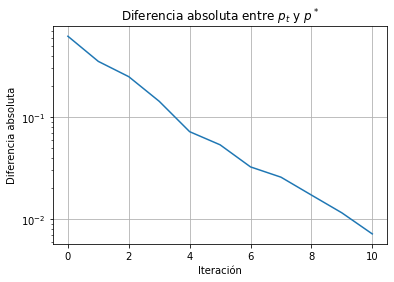

Resultado del método iterativo: MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11840253983682913 ]
    [ 0.10345824021963745 ]
    [ 0.04734563521960849 ]
    [ 0.1174713789990415 ]
    [ 0.04734563521960849 ]
    [ 0.01363636363636364 ]
])


In [ ]:
def PageRank(d, N, W, D):
    p_t0 = MatrizRala(N, 1)  # Initial equiprobable distribution
    for i in range(N):
        p_t0[i, 0] = 1 / N
    tolerance = 0.01
    diferencia = []
    error = 1

    Unos = MatrizRala(N,1)
    for i in range(N):
        Unos[i,0] = 1
    b = ((1 - d) / N) * Unos
    d_W = d * W
    d_WD = d_W @ D

    while error > tolerance:
        p_t1 = d_WD @ p_t0
        p_t1 = b + p_t1
        error = MatrizRala.diffVectors(p_t1,p_t0)
        diferencia.append(error)
        p_t0 = p_t1
    return p_t0, diferencia

N = 11
d = 0.85
page_ranks,diferencias = PageRank(d, N, W, D)


# Ejecutar el método iterativo
# Graficar la diferencia absoluta
plt.plot(diferencias)
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Diferencia absoluta')
plt.title('Diferencia absoluta entre $p_t$ y $p^*$')
plt.grid(True)
plt.show()

# Comparar los resultados de Gauss-Jordan y el método iterativo
print("Resultado del método iterativo:", page_ranks)